# CS512 - Assignment 3

## Akshay R (A20442409)

In [2]:
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import itertools

from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Pre-processing

In [5]:
# Merge x_train and x_test
data = np.zeros((70000, 28, 28),dtype=int)
for i in range(60000):
    data[i] = x_train[i]
for i in range(10000):
    data[60000 + i] = x_test[i]

# Merge y_train and y_test
labels = np.zeros(70000, dtype=int)
for i in range(60000):
    labels[i] = y_train[i]
for i in range(10000):
    labels[60000 + i] = y_test[i]

In [6]:
# Assign odd or even labels
# labels = 0 :: even , labels = 1 :: odd
for i in range (70000):
    if((labels[i] % 2) == 0):
        labels[i] = 0
    else:
        labels[i] = 1

In [7]:
# Create train test datasets, train will be further split nto train and validation datasets:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=5000)

In [8]:
# Standardize the data:
x_train_mean = np.mean(x_train)
x_train_std  = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean) / x_train_std
x_test  = (x_test - x_test_mean) / x_test_std 

In [9]:
# Convert lables to categorical labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# Create train and validation data sets:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 55000)

In [11]:
x_train[1]

array([[-0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415],
       [-0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415],
       [-0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.42446415, -0.42446415, -0.42446415, -0.42446415,
        -0.42446415, -0.4244

In [10]:
x_train = x_train.reshape(55000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)
x_test = x_test.reshape(5000, 28, 28, 1)
print("x_train ::", x_train.shape)
print("x_val   ::", x_val.shape)
print("x_test  ::", x_test.shape)
print("y_train ::", y_train.shape)
print("y_val   ::", y_val.shape)
print("y_test  ::", y_test.shape)

x_train :: (55000, 28, 28, 1)
x_val   :: (10000, 28, 28, 1)
x_test  :: (5000, 28, 28, 1)
y_train :: (55000, 2)
y_val   :: (10000, 2)
y_test  :: (5000, 2)


### Question 1:

#### Construct and train CNN

In [11]:
# Create model
model = models.Sequential()

model.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.50))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(2,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [12]:
from keras import optimizers
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-5),
    metrics = ['acc'])

In [13]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 1)
model.save("basic_odd_or_even.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 20s 357us/step - loss: 0.4635 - acc: 0.7952 - val_loss: 0.3024 - val_acc: 0.8814
Epoch 2/10
55000/55000 [==============================] - 19s 350us/step - loss: 0.2946 - acc: 0.8809 - val_loss: 0.2168 - val_acc: 0.9186
Epoch 3/10
55000/55000 [==============================] - 19s 351us/step - loss: 0.2274 - acc: 0.9124 - val_loss: 0.1640 - val_acc: 0.9411
Epoch 4/10
55000/55000 [==============================] - 21s 385us/step - loss: 0.1832 - acc: 0.9324 - val_loss: 0.1342 - val_acc: 0.9534
Epoch 5/10
55000/55000 [==============================] - 34s 622us/step - loss: 0.1545 - acc: 0.9442 - val_loss: 0.1106 - val_acc: 0.9626
Epoch 6/10
55000/55000 [==============================] - 26s 474us/step - loss: 0.1324 - acc: 0.9533 - val_loss: 0.0965 - val_acc: 0.9666
Epoch 7/10
55000/55000 [==============================] - 22s 408us/step - loss: 0.1171 - acc: 0.9585 - val_loss: 0.

In [14]:
print("The accuracy of the last step while training: ", str(history.history['acc'][-1]))
print("The loss of the last step while training: ", str(history.history['loss'][-1]))

The accuracy of the last step while training:  0.96729094
The loss of the last step while training:  0.09027373099530285


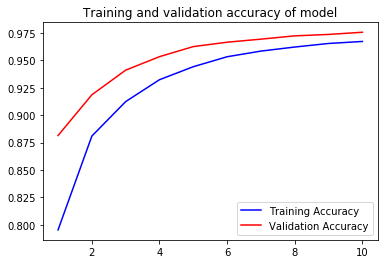

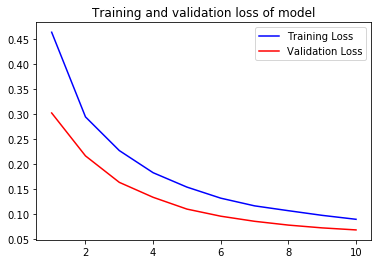

In [15]:
#model results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy of model')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss of model')
plt.legend()
plt.show()

In [16]:
# Test and Validation accuracy on the test dataset
loss0, accuracy0 = model.evaluate(x_test, y_test, verbose=1)
loss_v0, accuracy_v0 = model.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v0, loss_v0))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy0, loss0))

10000/10000 [==============================] - 2s 152us/step
Validation: accuracy = 0.975700  ;  loss_v = 0.069086
Test: accuracy = 0.978600  ;  loss = 0.068771


### Question 2

#### Hyper parameter tuning

#### a) Change the network architecture

In [17]:
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(Dropout(0.50))

model1.add(layers.Flatten())

model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(2,activation = 'softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 32)         

In [18]:
from keras import optimizers
model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-5),
    metrics = ['acc'])

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size = 500,
                    validation_data = (x_val, y_val),
                    verbose = 1)
model1.save("custom1_odd_or_even.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 15s 268us/step - loss: 0.6855 - acc: 0.5550 - val_loss: 0.6744 - val_acc: 0.7496
Epoch 2/10
55000/55000 [==============================] - 14s 257us/step - loss: 0.6688 - acc: 0.6305 - val_loss: 0.6539 - val_acc: 0.8104
Epoch 3/10
55000/55000 [==============================] - 15s 264us/step - loss: 0.6494 - acc: 0.6801 - val_loss: 0.6283 - val_acc: 0.8242
Epoch 4/10
55000/55000 [==============================] - 15s 271us/step - loss: 0.6253 - acc: 0.7128 - val_loss: 0.5973 - val_acc: 0.8396
Epoch 5/10
55000/55000 [==============================] - 16s 290us/step - loss: 0.5991 - acc: 0.7372 - val_loss: 0.5625 - val_acc: 0.8517
Epoch 6/10
55000/55000 [==============================] - 15s 276us/step - loss: 0.5681 - acc: 0.7567 - val_loss: 0.5238 - val_acc: 0.8598
Epoch 7/10
55000/55000 [==============================] - 15s 270us/step - loss: 0.5364 - acc: 0.7737 - val_loss: 0.

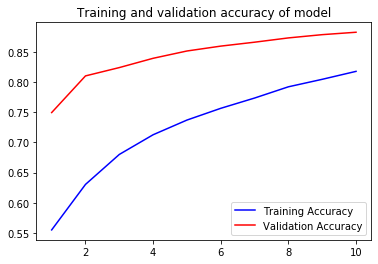

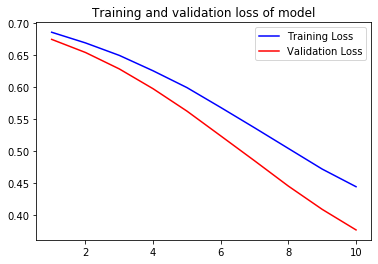

In [19]:
#model results
import matplotlib.pyplot as plt
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy of model')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss of model')
plt.legend()
plt.show()

In [20]:
# Test and Validation accuracy on the test dataset
loss1, accuracy1 = model1.evaluate(x_test, y_test, verbose=1)
loss_v1, accuracy_v1 = model1.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v1, loss_v1))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy1, loss1))

10000/10000 [==============================] - 1s 51us/step
Validation: accuracy = 0.882800  ;  loss_v = 0.377109
Test: accuracy = 0.884600  ;  loss = 0.378791


#### b) Changing the receptive field and stride parameters

In [42]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation = 'relu', strides=(2, 2),))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(Dropout(0.50))

model2.add(layers.Flatten())

model2.add(layers.Dense(512, activation = 'relu'))
model2.add(layers.Dense(2,activation = 'softmax'))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)              

In [43]:
from keras import optimizers
model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-5),
    metrics = ['acc'])

history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 1)
model2.save("custom2_odd_or_even.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 217us/step - loss: 0.5753 - acc: 0.7238 - val_loss: 0.4499 - val_acc: 0.8285
Epoch 2/10
55000/55000 [==============================] - 12s 223us/step - loss: 0.4309 - acc: 0.8163 - val_loss: 0.3332 - val_acc: 0.8777
Epoch 3/10
55000/55000 [==============================] - 12s 214us/step - loss: 0.3552 - acc: 0.8540 - val_loss: 0.2730 - val_acc: 0.8995
Epoch 4/10
55000/55000 [==============================] - 12s 215us/step - loss: 0.3064 - acc: 0.8760 - val_loss: 0.2362 - val_acc: 0.9137
Epoch 5/10
55000/55000 [==============================] - 12s 217us/step - loss: 0.2781 - acc: 0.8895 - val_loss: 0.2101 - val_acc: 0.9231
Epoch 6/10
55000/55000 [==============================] - 12s 213us/step - loss: 0.2548 - acc: 0.8997 - val_loss: 0.1921 - val_acc: 0.9299
Epoch 7/10
55000/55000 [==============================] - 12s 214us/step - loss: 0.2379 - acc: 0.9059 - val_loss: 0.

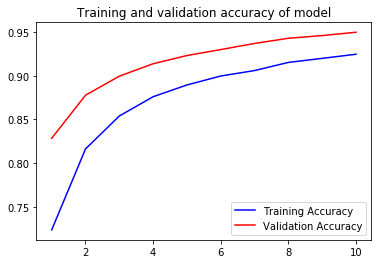

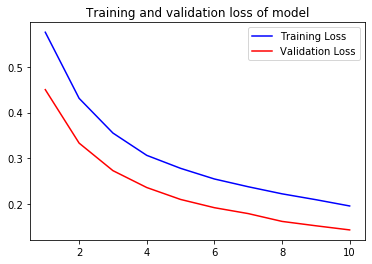

In [44]:
#model results
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy of model')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss of model')
plt.legend()
plt.show()

In [45]:
# Test and Validation accuracy on the test dataset
loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=1)
loss_v2, accuracy_v2 = model2.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v2, loss_v2))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy2, loss2))

10000/10000 [==============================] - 1s 88us/step
Validation: accuracy = 0.949700  ;  loss_v = 0.143597
Test: accuracy = 0.945000  ;  loss = 0.150168


#### c) Changing the optimizer and loss functions:

In [47]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (5, 5), activation = 'relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(Dropout(0.50))

model3.add(layers.Flatten())

model3.add(layers.Dense(512, activation = 'relu'))
model3.add(layers.Dense(2,activation = 'softmax'))

model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)              

In [48]:
from keras import optimizers
model3.compile(
    loss = 'categorical_hinge',
    optimizer = optimizers.Adam(lr = 1e-5),
    metrics = ['acc'])

history3 = model3.fit(x_train, y_train,
                    epochs=20,
                    batch_size = 500,
                    validation_data = (x_val, y_val),
                    verbose = 1)
model3.save("custom3_odd_or_even.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 15s 278us/step - loss: 0.8892 - acc: 0.6576 - val_loss: 0.7288 - val_acc: 0.7926
Epoch 2/20
55000/55000 [==============================] - 15s 272us/step - loss: 0.6510 - acc: 0.7863 - val_loss: 0.5006 - val_acc: 0.8329
Epoch 3/20
55000/55000 [==============================] - 15s 267us/step - loss: 0.4860 - acc: 0.8250 - val_loss: 0.3818 - val_acc: 0.8601
Epoch 4/20
55000/55000 [==============================] - 15s 267us/step - loss: 0.4000 - acc: 0.8458 - val_loss: 0.3236 - val_acc: 0.8733
Epoch 5/20
55000/55000 [==============================] - 15s 268us/step - loss: 0.3502 - acc: 0.8603 - val_loss: 0.2862 - val_acc: 0.8872
Epoch 6/20
55000/55000 [==============================] - 15s 267us/step - loss: 0.3130 - acc: 0.8743 - val_loss: 0.2581 - val_acc: 0.8952
Epoch 7/20
55000/55000 [==============================] - 16s 284us/step - loss: 0.2843 - acc: 0.8843 - val_loss: 0.

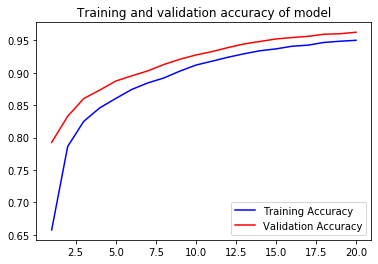

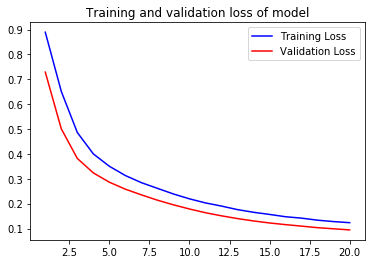

In [49]:
#model results
import matplotlib.pyplot as plt
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy of model')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss of model')
plt.legend()
plt.show()

In [50]:
# Test and Validation accuracy on the test dataset
loss3, accuracy3 = model3.evaluate(x_test, y_test, verbose=1)
loss_v3, accuracy_v3 = model3.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v3, loss_v3))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy3, loss3))

10000/10000 [==============================] - 1s 143us/step
Validation: accuracy = 0.962500  ;  loss_v = 0.094333
Test: accuracy = 0.960800  ;  loss = 0.096162


#### d) Changing Various parameters (learning rate and number of epochs)

In [51]:
model4 = models.Sequential()

model4.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model4.add(layers.Conv2D(64, (5, 5), activation = 'relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model4.add(Dropout(0.50))

model4.add(layers.Flatten())

model4.add(layers.Dense(512, activation = 'relu'))
model4.add(layers.Dense(2,activation = 'softmax'))

model4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)             

In [52]:
from keras import optimizers
model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-6),
    metrics = ['acc'])

history4 = model4.fit(x_train, y_train,
                    epochs=20,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 1)
model4.save("custom4_odd_or_even.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 22s 405us/step - loss: 0.6948 - acc: 0.5462 - val_loss: 0.6312 - val_acc: 0.7011
Epoch 2/20
55000/55000 [==============================] - 22s 407us/step - loss: 0.6119 - acc: 0.6935 - val_loss: 0.5548 - val_acc: 0.7918
Epoch 3/20
55000/55000 [==============================] - 23s 420us/step - loss: 0.5468 - acc: 0.7684 - val_loss: 0.4938 - val_acc: 0.8134
Epoch 4/20
55000/55000 [==============================] - 22s 403us/step - loss: 0.4964 - acc: 0.8001 - val_loss: 0.4427 - val_acc: 0.8320
Epoch 5/20
55000/55000 [==============================] - 22s 407us/step - loss: 0.4553 - acc: 0.8160 - val_loss: 0.4023 - val_acc: 0.8449
Epoch 6/20
55000/55000 [==============================] - 23s 412us/step - loss: 0.4213 - acc: 0.8296 - val_loss: 0.3710 - val_acc: 0.8536
Epoch 7/20
55000/55000 [==============================] - 23s 419us/step - loss: 0.3936 - acc: 0.8410 - val_loss: 0.

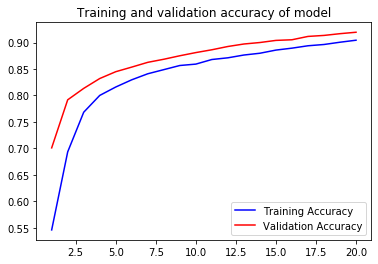

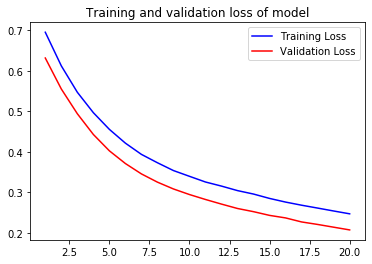

In [53]:
#model results
import matplotlib.pyplot as plt
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy of model')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss of model')
plt.legend()
plt.show()

In [54]:
# Test and Validation accuracy on the test dataset
loss4, accuracy4 = model4.evaluate(x_test, y_test, verbose=1)
loss_v4, accuracy_v4 = model4.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v4, loss_v4))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy4, loss4))

10000/10000 [==============================] - 2s 151us/step
Validation: accuracy = 0.919400  ;  loss_v = 0.207274
Test: accuracy = 0.916200  ;  loss = 0.215745


#### e) Adding batch and layer normalization

In [55]:
model5 = models.Sequential()

model5.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(BatchNormalization())

model5.add(layers.Conv2D(64, (5, 5), activation = 'relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(BatchNormalization())

model5.add(Dropout(0.50))

model5.add(layers.Flatten())

model5.add(layers.Dense(512, activation = 'relu'))
model5.add(BatchNormalization())
model5.add(layers.Dense(2,activation = 'softmax'))

model5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 64)        

In [56]:
from keras import optimizers
model5.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-5),
    metrics = ['acc'])

history5 = model5.fit(x_train, y_train,
                    epochs=10,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 1)
model5.save("custom5_odd_or_even.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 30s 550us/step - loss: 0.3573 - acc: 0.8442 - val_loss: 0.1369 - val_acc: 0.9513
Epoch 2/10
55000/55000 [==============================] - 31s 560us/step - loss: 0.1757 - acc: 0.9318 - val_loss: 0.0861 - val_acc: 0.9706
Epoch 3/10
55000/55000 [==============================] - 31s 570us/step - loss: 0.1301 - acc: 0.9514 - val_loss: 0.0713 - val_acc: 0.9770
Epoch 4/10
55000/55000 [==============================] - 31s 559us/step - loss: 0.1083 - acc: 0.9604 - val_loss: 0.0618 - val_acc: 0.9795
Epoch 5/10
55000/55000 [==============================] - 31s 567us/step - loss: 0.0954 - acc: 0.9652 - val_loss: 0.0557 - val_acc: 0.9806
Epoch 6/10
55000/55000 [==============================] - 31s 567us/step - loss: 0.0841 - acc: 0.9685 - val_loss: 0.0513 - val_acc: 0.9823
Epoch 7/10
55000/55000 [==============================] - 31s 568us/step - loss: 0.0782 - acc: 0.9713 - val_loss: 0.

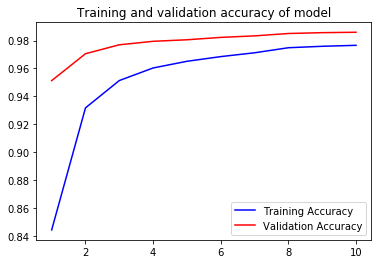

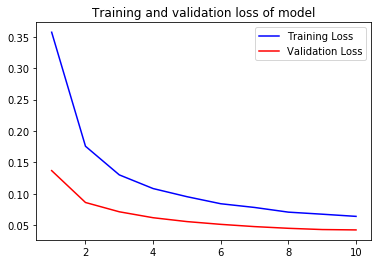

In [57]:
#model results
import matplotlib.pyplot as plt
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy of model')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss of model')
plt.legend()
plt.show()

In [58]:
# Test and Validation accuracy on the test dataset
loss5, accuracy5 = model5.evaluate(x_test, y_test, verbose=1)
loss_v5, accuracy_v5 = model5.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v5, loss_v5))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy5, loss5))

10000/10000 [==============================] - 2s 186us/step
Validation: accuracy = 0.986000  ;  loss_v = 0.042431
Test: accuracy = 0.983600  ;  loss = 0.044559


#### f) Use different weight initializers

In [59]:
# Create model
model6 = models.Sequential()

model6.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(64, (5, 5), activation = 'relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(Dropout(0.50))

model6.add(layers.Flatten())

model6.add(layers.Dense(512, activation = 'relu', kernel_initializer='orthogonal'))
model6.add(layers.Dense(2,activation = 'softmax'))

model6.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)             

In [60]:
from keras import optimizers
model6.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-5),
    metrics = ['acc'])

history6 = model6.fit(x_train, y_train,
                    epochs=10,
                    batch_size = 100,
                    validation_data = (x_val, y_val),
                    verbose = 1)
model6.save("custom6_odd_or_even.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 23s 425us/step - loss: 0.4560 - acc: 0.7968 - val_loss: 0.2981 - val_acc: 0.8812
Epoch 2/10
55000/55000 [==============================] - 23s 425us/step - loss: 0.2936 - acc: 0.8786 - val_loss: 0.2175 - val_acc: 0.9152
Epoch 3/10
55000/55000 [==============================] - 23s 424us/step - loss: 0.2269 - acc: 0.9116 - val_loss: 0.1631 - val_acc: 0.9415
Epoch 4/10
55000/55000 [==============================] - 23s 423us/step - loss: 0.1818 - acc: 0.9328 - val_loss: 0.1272 - val_acc: 0.9543
Epoch 5/10
55000/55000 [==============================] - 24s 429us/step - loss: 0.1488 - acc: 0.9469 - val_loss: 0.1039 - val_acc: 0.9644
Epoch 6/10
55000/55000 [==============================] - 23s 420us/step - loss: 0.1265 - acc: 0.9556 - val_loss: 0.0895 - val_acc: 0.9699
Epoch 7/10
55000/55000 [==============================] - 23s 418us/step - loss: 0.1128 - acc: 0.9604 - val_loss: 0.

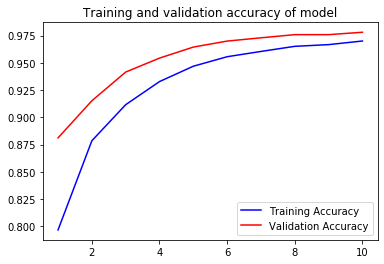

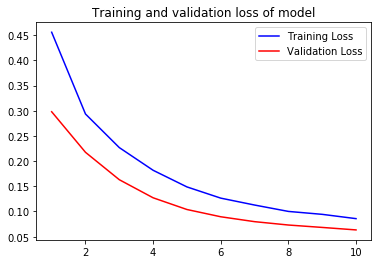

In [61]:
#model results
import matplotlib.pyplot as plt
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy of model')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss of model')
plt.legend()
plt.show()

In [40]:
# Test and Validation accuracy on the test dataset
loss6, accuracy6 = model6.evaluate(x_test, y_test, verbose=1)
loss_v6, accuracy_v6 = model6.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v6, loss_v6))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy6, loss6))

10000/10000 [==============================] - 2s 162us/step
Validation: accuracy = 0.976900  ;  loss_v = 0.067384
Test: accuracy = 0.977000  ;  loss = 0.067868


#### g) Evaluate the best vlaidation model on the testing subset and report the results

In [62]:
import plotly.graph_objects as go

headerColor = 'black'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>MODELS</b>','<b>Validation Accuracy</b>','<b>Validation Loss</b>','<b>Test Accuracy</b>','<b>Test Loss</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Basic model', 'Change the network architecture', 'Changing the receptive field and stride parameters',
       'Changing the optimizer and loss functions:','Changing Various parameters (learning rate and number of epochs)',
       '<b>Adding batch and layer normalization</b>','Use different weight initializers'],
      [accuracy_v0, accuracy_v1, accuracy_v2, accuracy_v3, accuracy_v4, accuracy_v5, accuracy_v6],
      [loss_v0, loss_v1, loss_v2, loss_v3, loss_v4, loss_v5, loss_v6],
      [accuracy0, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6],
      [loss0, loss1, loss2, loss3, loss4, loss5, loss6]],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor, rowOddColor, rowOddColor, rowOddColor,rowOddColor, rowEvenColor, rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()